In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data2.csv')
data.head(6)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
#   we can see from info that there are no null values but from data we can observe that thhere are "?"

In [6]:
(data=="?").sum()     # found the no of ? in each column

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
''' We can make broader classes in work class and occupation and put The most repeated value
into the question marks and we can remove the country column because country does not really
give much information about income instead of there will be GDP or something like per capita
income then we should have considered it  '''

In [7]:
data.drop('native.country',axis=1,inplace=True)

In [8]:
data['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
data['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [10]:
workclass_mapping = {
    'Federal-gov': 'Government',
    'State-gov': 'Government',
    'Local-gov': 'Government',
    'Self-emp-inc': 'Self-Employed',
    'Self-emp-not-inc': 'Self-Employed',
    'Private': 'Private',
    '?': '?',
    'Without-pay': 'Unemployed',
    'Never-worked': 'Unemployed'
}

data['workclass_category'] = data['workclass'].map(workclass_mapping)

In [11]:
occ_mapping = {
    'Prof-specialty': 'Management & Professional',
    'Craft-repair': 'Technical & skilled trades',
    'Exec-managerial': 'Management & Professional',
    'Machine-op-inspct': 'Technical & skilled trades',
    'Tech-support': 'Technical & skilled trades',
    'Transport-moving' : 'Technical & skilled trades',
    'Other-service' : 'Services & Sales',
    'Handlers-cleaners' : 'Services & Sales',
    'Sales' : 'Services & Sales',
    'Protective-serv' : 'Services & Sales',
    'Priv-house-serv' : 'Services & Sales',
    'Farming-fishing' : 'Agriculture',
    'Adm-clerical' : 'Management & Professional',
    'Armed-Forces' : 'Defence Service',
    '?': '?'
}

data['occupation_category'] = data['occupation'].map(occ_mapping)

In [12]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'income',
       'workclass_category', 'occupation_category'],
      dtype='object')

In [13]:
data.drop(['workclass','occupation'],axis=1,inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  32561 non-null  int64 
 1   fnlwgt               32561 non-null  int64 
 2   education            32561 non-null  object
 3   education.num        32561 non-null  int64 
 4   marital.status       32561 non-null  object
 5   relationship         32561 non-null  object
 6   race                 32561 non-null  object
 7   sex                  32561 non-null  object
 8   capital.gain         32561 non-null  int64 
 9   capital.loss         32561 non-null  int64 
 10  hours.per.week       32561 non-null  int64 
 11  income               32561 non-null  object
 12  workclass_category   32561 non-null  object
 13  occupation_category  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [16]:
data.head(20)

,age,fnlwgt,education,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,workclass_category,occupation_category
0,90,77053,HS-grad,9,Widowed,Not-in-family,White,Female,0,4356,40,<=50K,?,?
1,82,132870,HS-grad,9,Widowed,Not-in-family,White,Female,0,4356,18,<=50K,Private,Management & Professional
2,66,186061,Some-college,10,Widowed,Unmarried,Black,Female,0,4356,40,<=50K,?,?
3,54,140359,7th-8th,4,Divorced,Unmarried,White,Female,0,3900,40,<=50K,Private,Technical & skilled trades
4,41,264663,Some-college,10,Separated,Own-child,White,Female,0,3900,40,<=50K,Private,Management & Professional
5,34,216864,HS-grad,9,Divorced,Unmarried,White,Female,0,3770,45,<=50K,Private,Services & Sales
6,38,150601,10th,6,Separated,Unmarried,White,Male,0,3770,40,<=50K,Private,Management & Professional
7,74,88638,Doctorate,16,Never-married,Other-relative,White,Female,0,3683,20,>50K,Government,Management & Professional
8,68,422013,HS-grad,9,Divorced,Not-in-family,White,Female,0,3683,40,<=50K,Government,Management & Professional
9,41,70037,Some-college,10,Never-married,Unmarried,White,Male,0,3004,60,>50K,Private,Technical & skilled trades


In [19]:
data['workclass_category'].unique().tolist()
data['workclass_category'].value_counts()

workclass_category
Private          22696
Government        4351
Self-Employed     3657
?                 1836
Unemployed          21
Name: count, dtype: int64

In [21]:
data['workclass_category'] = data['workclass_category'].replace('?', 'Private')
data['workclass_category'].value_counts()

workclass_category
Private          24532
Government        4351
Self-Employed     3657
Unemployed          21
Name: count, dtype: int64

In [22]:
data['occupation_category'].unique().tolist()
data['occupation_category'].value_counts()

occupation_category
Management & Professional     11976
Services & Sales               9113
Technical & skilled trades     8626
?                              1843
Agriculture                     994
Defence Service                   9
Name: count, dtype: int64

In [23]:
# 32561 entries mese if we remove 1843 so that wont affect much but instead help to build good model

In [24]:
data.drop(data[data['occupation_category'] == '?'].index, inplace=True)

In [25]:
data['occupation_category'].value_counts()

occupation_category
Management & Professional     11976
Services & Sales               9113
Technical & skilled trades     8626
Agriculture                     994
Defence Service                   9
Name: count, dtype: int64

In [26]:
data.columns

Index(['age', 'fnlwgt', 'education', 'education.num', 'marital.status',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'workclass_category',
       'occupation_category'],
      dtype='object')

In [27]:
data['marital.status'].value_counts()

marital.status
Married-civ-spouse       14339
Never-married             9912
Divorced                  4258
Separated                  959
Widowed                    840
Married-spouse-absent      389
Married-AF-spouse           21
Name: count, dtype: int64

In [28]:
data['relationship'].value_counts()

relationship
Husband           12704
Not-in-family      7865
Own-child          4525
Unmarried          3271
Wife               1435
Other-relative      918
Name: count, dtype: int64

In [ ]:
# keeping relationship coz it holds the maritial status too

In [29]:
data.drop(['race', 'sex', 'marital.status', 'fnlwgt', 'education'], axis=1, inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30718 entries, 1 to 32560
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  30718 non-null  int64 
 1   education.num        30718 non-null  int64 
 2   relationship         30718 non-null  object
 3   capital.gain         30718 non-null  int64 
 4   capital.loss         30718 non-null  int64 
 5   hours.per.week       30718 non-null  int64 
 6   income               30718 non-null  object
 7   workclass_category   30718 non-null  object
 8   occupation_category  30718 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.3+ MB


In [31]:
# using label encoding in occuption and workclass and relationship as we want so bias to good profiles

In [32]:
from sklearn.preprocessing import LabelEncoder

le_workclass = LabelEncoder()
data['workclass_category_encoded'] = le_workclass.fit_transform(data['workclass_category'])

le_occupation = LabelEncoder()
data['occupation_category_encoded'] = le_occupation.fit_transform(data['occupation_category'])


In [33]:
data.drop(['workclass_category', 'occupation_category'], axis=1, inplace=True)

In [34]:
le_relationship = LabelEncoder()
data['relationship_encoded'] = le_relationship.fit_transform(data['relationship'])

data.drop('relationship', axis=1, inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30718 entries, 1 to 32560
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   age                          30718 non-null  int64 
 1   education.num                30718 non-null  int64 
 2   capital.gain                 30718 non-null  int64 
 3   capital.loss                 30718 non-null  int64 
 4   hours.per.week               30718 non-null  int64 
 5   income                       30718 non-null  object
 6   workclass_category_encoded   30718 non-null  int64 
 7   occupation_category_encoded  30718 non-null  int64 
 8   relationship_encoded         30718 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 2.3+ MB


In [36]:
y = data['income']  # target column , we got in series
X = data.drop('income', axis=1) # other features in X dataframe

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30718 entries, 1 to 32560
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          30718 non-null  int64
 1   education.num                30718 non-null  int64
 2   capital.gain                 30718 non-null  int64
 3   capital.loss                 30718 non-null  int64
 4   hours.per.week               30718 non-null  int64
 5   workclass_category_encoded   30718 non-null  int64
 6   occupation_category_encoded  30718 non-null  int64
 7   relationship_encoded         30718 non-null  int64
dtypes: int64(8)
memory usage: 2.1 MB


In [39]:
le_income = LabelEncoder()
y_encoded = le_income.fit_transform(y)

In [40]:
y.value_counts()

income
<=50K    23068
>50K      7650
Name: count, dtype: int64

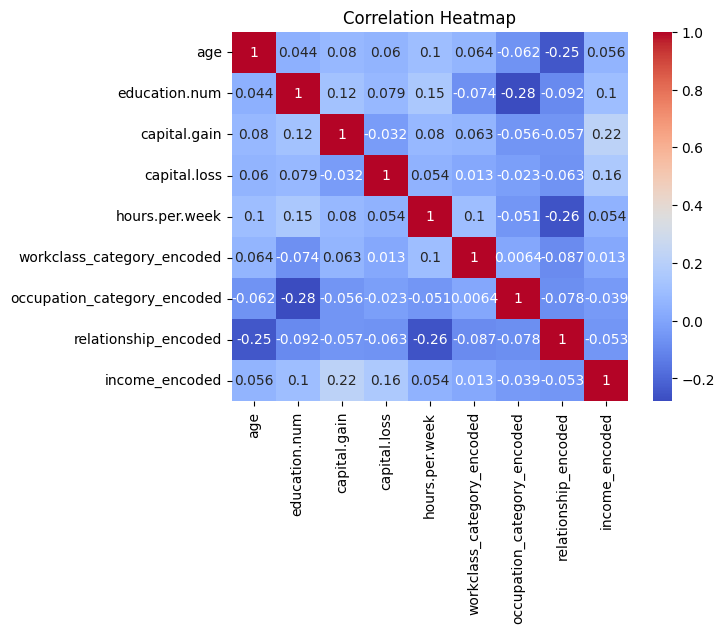

In [41]:
data_corr = pd.concat([X, pd.Series(y_encoded, name='income_encoded')], axis=1)
correlations = data_corr.corr()

# visualizing thr co relation

sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

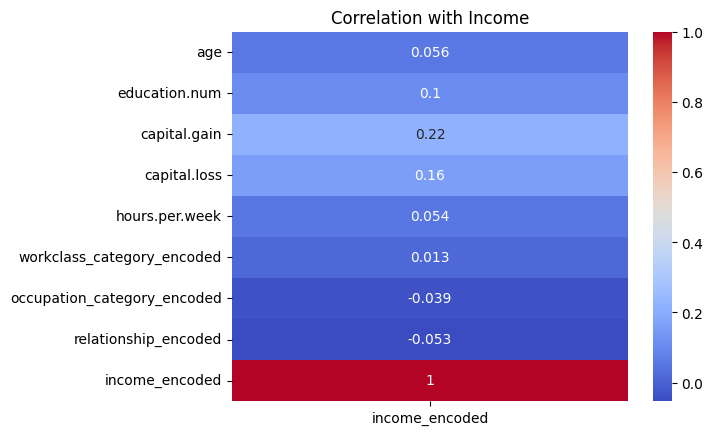

In [45]:
# visualizing with target column
target_correlations = correlations['income_encoded']

sns.heatmap(target_correlations.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation with Income')
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled    #scalinggg

array([[ 3.32035145, -0.44111092, -0.14751604, ...,  0.04235373,
        -0.82689482, -0.26055585],
       [ 1.18588199, -2.39238614, -0.14751604, ...,  0.04235373,
         1.25785199,  1.61283605],
       [ 0.19487831, -0.05085588, -0.14751604, ...,  0.04235373,
        -0.82689482,  0.98837208],
       ...,
       [ 0.11864726, -0.44111092, -0.14751604, ...,  0.04235373,
         1.25785199, -0.88501982],
       [ 1.4908062 , -0.44111092, -0.14751604, ...,  0.04235373,
        -0.82689482,  1.61283605],
       [-1.25351168, -0.44111092, -0.14751604, ...,  0.04235373,
        -0.82689482,  0.98837208]])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# checking Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

# Define a grid of hyperparameters to search over
# 'C' is the regularization strength, with lower values indicating stronger regularization
# 'penalty' specifies the type of regularization to use ('none' for no regularization, 'l2' for L2 regularization)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['none', 'l2'],
}

In [50]:
# Initialize the LogisticRegression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)


In [51]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV to perform an exhaustive search over the parameter grid
# 'scoring' specifies the metric to optimize (accuracy in this case)
# 'cv' specifies the number of cross-validation folds
# 'n_jobs=-1' allows parallel processing using all available CPU cores
# 'verbose=3' provides detailed output about the progress of the grid search
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,scoring='accuracy', cv=2,n_jobs=-1,verbose=3)

In [52]:
# Fit GridSearchCV on the training data to search for the best hyperparameters
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


GridSearchCV(cv=2, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['none', 'l2']},
             scoring='accuracy', verbose=3)

In [53]:
# Retrieve the best hyperparameters found during the grid search
best_params = grid_search.best_params_
# Retrieve the best score achieved with the best hyperparameters
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Cross-Validation Score: 0.8188540600874337


In [55]:
from sklearn.metrics import accuracy_score, classification_report
# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nBest Model Performance:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)



Best Model Performance:
Accuracy: 0.8170572916666666
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      6932
        >50K       0.71      0.44      0.54      2284

    accuracy                           0.82      9216
   macro avg       0.77      0.69      0.71      9216
weighted avg       0.81      0.82      0.80      9216



In [56]:
# The model struggles to correctly identify individuals with higher income
# The model is doing a good job at identifying individuals with lower income.

In [57]:
y.value_counts()

income
<=50K    23068
>50K      7650
Name: count, dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(y_encoded)
print(np.unique(y_encoded))


[0 0 0 ... 1 0 0]
[0 1]


# checking XGBOOST

In [66]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE()


# Apply SMOTE to the scaled feature set (X_scaled) and the target variable (y)
# This will create a balanced dataset by oversampling the minority class
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)
# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, train_size=0.7,test_size=0.3, random_state=42)

from xgboost import XGBClassifier

# Initialize the XGBClassifier
xgb_clf = XGBClassifier(random_state=42, eval_metric='mlogloss', n_estimators=100)

# eval_metric='mlogloss' specifies the evaluation metric to use, in this case, log loss for multi-class classification
# n_estimators=100 sets the number of boosting rounds (trees) to 100

# Train the XGBClassifier on the resampled training data
xgb_clf.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [67]:
# use the model to make predictions on the resampled test data
y_pred_xgb = xgb_clf.predict(X_test_resampled)


print(accuracy_score(y_test_resampled, y_pred_xgb))

0.8838234231630663


In [68]:
print(classification_report(y_test_resampled, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.90      0.87      0.88      6935
           1       0.87      0.90      0.89      6906

    accuracy                           0.88     13841
   macro avg       0.88      0.88      0.88     13841
weighted avg       0.88      0.88      0.88     13841



😭😭😭😭😭
# we finally found the best model

In [69]:
# Initialize an XGBClassifier instance for the final model
xgb_clf_final = XGBClassifier(random_state=42, eval_metric='mlogloss', n_estimators=100)


# Train the final XGBClassifier on the entire resampled dataset
xgb_clf_final.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [70]:
# Import the joblib library for saving and loading Python objects
import joblib

# Define the file path where the model will be saved
model_path = 'income_xgb_model.pkl'

# Save the trained XGBClassifier model to the specified file path using joblib
# joblib.dump serializes the model object and writes it to a file
joblib.dump(xgb_clf, model_path)

print(f"Model saved to {model_path}")


Model saved to income_xgb_model.pkl
